In [5]:
import numpy as np
import matplotlib.pyplot as plt
from diffusers import DDPMPipeline, AutoencoderKL

from torchvision.transforms import (
    Compose,
    Resize,
    CenterCrop,
    ToTensor,
    Normalize,
    InterpolationMode,
)

import torch

torch.Size([1, 4, 32, 32])


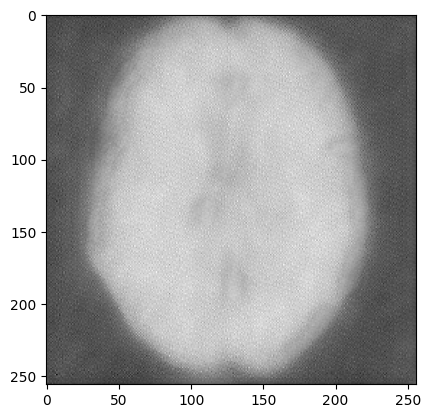

In [9]:

# Load the VAE model
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
vae.eval() # set the model to evaluation mode

lat0 = np.load('latent_log/latent_0_0.npy')
lat1 = np.load('latent_log/latent_0_1.npy')
lat2 = np.load('latent_log/latent_0_2.npy')
lat3 = np.load('latent_log/latent_0_3.npy')

# Convert to tensor and remove the extra channel using .squeeze(0)
latents = torch.stack([
    ToTensor()(lat0).squeeze(0),  # Shape [32, 32]
    ToTensor()(lat1).squeeze(0),
    ToTensor()(lat2).squeeze(0),
    ToTensor()(lat3).squeeze(0)
], dim=0)  # Shape: [4, 32, 32]

# Add batch dimension
latents = latents.unsqueeze(0)  # Final Shape: [1, 4, 32, 32]

print(latents.shape)

decoded = vae.decode(latents).sample # Add batch dim

plt.imshow(decoded[0][0].detach().cpu().numpy(), cmap='gray')